In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
#this shows a 2 dimensional array with 500 cells in each direction

In [3]:
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
number_of_pixels = 500
number_of_pixel_x = 500
number_of_pixel_y = 500
electrons_per_photon = 1500 #electrons
#center of each pixel can be calculated by multiplying it's i or j value by 15 and adding 7.5
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
x_rand = random.random() * pixel_edge_length * number_of_pixels #microns
y_rand = random.random() * pixel_edge_length * number_of_pixels #microns
print("photon hit at [x,y] = [" + str(x_rand) + ", " + str(y_rand) + "] in microns")

photon hit at [x,y] = [6272.986840740213, 5754.110182789345] in microns


In [7]:
 #to do: which center of pixel(s) is closest to the random generated values
#calculate percentage of cloud in each pixel based on distance from center of multiple pixels
#strategy: attempt to make a function to calculate distance from center of circle
#to the center of each of the 4 surrounding pixels and 
#relate that number to the percentage of the circle that overlaps the pixels
#x_rand and y_rand is the center point of the circle
#sqrt((x2-x1)^2 + (y2-y1)^2)
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns
area_electron_cloud = np.pi * (radius_electron_cloud ** 2)
#take x_rand and y_rand to find closest pixel(s)

In [8]:
#define detector_array_x and y
detector_array_x = np.arange(number_of_pixel_x) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(number_of_pixel_y) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [9]:
#redefining variables to be more precise
photon_sphere_x = x_rand #microns
photon_sphere_y = y_rand #microns
photon_sphere_z= 15
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere micron position " + str(photon_sphere_microns))
print("sphere pixel position " + str(photon_sphere_pixel))


sphere micron position [6272.986840740213, 5754.110182789345, 15]
sphere pixel position [418.1991227160142, 383.6073455192897]


In [10]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))
#second_closest_pixel_x =
#second_closest_pixel_y = 
#second_closest_pixel_arr = 

closest pixel to sphere: [418, 383]
closest pixel's center in microns: [6277.5, 5752.5]


In [11]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 4.513159259787244 microns, distance in y: 1.6101827893453446 microns
total distance from center of sphere to center of pixel: 4.7917945614672695 microns


In [12]:
#use distance values and write a if, ifelse etc statement to solve for when the circle is:
#contained within the pixel, intersected by one line (in y or x), or  intersected by 2 lines (in y and x)
electrons_per_photon = 1500 #electrons
max_dist_from_center = (pixel_edge_length - diameter_electron_cloud) / 2
if (dist_sphere_pixel_x < max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon contained within pixel ' + str(closest_pixel_arr))
    detector_array [closest_pixel_x, closest_pixel_y] = electrons_per_photon
elif (dist_sphere_pixel_x >= max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon bisected by vertical line')
#vertical line means we need to use the x distance to find the are or % of sphere that spills into next pixel
elif (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x < max_dist_from_center):
    print('photon bisected by horizontal line')
else (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x >= max_dist_from_center):
    
    


SyntaxError: invalid syntax (<ipython-input-12-0b766b217fa3>, line 13)

In [13]:
sm_pixel_edge_length = .5 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_num_of_pixels = 90
sm_third_pixels = sm_num_of_pixels / 3
sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y] - pixel_half_length) + sm_pixel_edge_length   

In [14]:
sm_x_cen

array([6270.5, 6271. , 6271.5, 6272. , 6272.5, 6273. , 6273.5, 6274. ,
       6274.5, 6275. , 6275.5, 6276. , 6276.5, 6277. , 6277.5, 6278. ,
       6278.5, 6279. , 6279.5, 6280. , 6280.5, 6281. , 6281.5, 6282. ,
       6282.5, 6283. , 6283.5, 6284. , 6284.5, 6285. , 6285.5, 6286. ,
       6286.5, 6287. , 6287.5, 6288. , 6288.5, 6289. , 6289.5, 6290. ,
       6290.5, 6291. , 6291.5, 6292. , 6292.5, 6293. , 6293.5, 6294. ,
       6294.5, 6295. , 6295.5, 6296. , 6296.5, 6297. , 6297.5, 6298. ,
       6298.5, 6299. , 6299.5, 6300. , 6300.5, 6301. , 6301.5, 6302. ,
       6302.5, 6303. , 6303.5, 6304. , 6304.5, 6305. , 6305.5, 6306. ,
       6306.5, 6307. , 6307.5, 6308. , 6308.5, 6309. , 6309.5, 6310. ,
       6310.5, 6311. , 6311.5, 6312. , 6312.5, 6313. , 6313.5, 6314. ,
       6314.5, 6315. ])

In [15]:
detector_array_x[closest_pixel_x]

array([6277.5])

In [16]:
sm_y_cen

array([5745.5, 5746. , 5746.5, 5747. , 5747.5, 5748. , 5748.5, 5749. ,
       5749.5, 5750. , 5750.5, 5751. , 5751.5, 5752. , 5752.5, 5753. ,
       5753.5, 5754. , 5754.5, 5755. , 5755.5, 5756. , 5756.5, 5757. ,
       5757.5, 5758. , 5758.5, 5759. , 5759.5, 5760. , 5760.5, 5761. ,
       5761.5, 5762. , 5762.5, 5763. , 5763.5, 5764. , 5764.5, 5765. ,
       5765.5, 5766. , 5766.5, 5767. , 5767.5, 5768. , 5768.5, 5769. ,
       5769.5, 5770. , 5770.5, 5771. , 5771.5, 5772. , 5772.5, 5773. ,
       5773.5, 5774. , 5774.5, 5775. , 5775.5, 5776. , 5776.5, 5777. ,
       5777.5, 5778. , 5778.5, 5779. , 5779.5, 5780. , 5780.5, 5781. ,
       5781.5, 5782. , 5782.5, 5783. , 5783.5, 5784. , 5784.5, 5785. ,
       5785.5, 5786. , 5786.5, 5787. , 5787.5, 5788. , 5788.5, 5789. ,
       5789.5, 5790. ])

In [17]:
sm_z_cen = np.arange(sm_num_of_pixels)*sm_pixel_edge_length

In [18]:
for i in range(sm_num_of_pixels):
    for j in range(sm_num_of_pixels):
        for k in range(sm_num_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

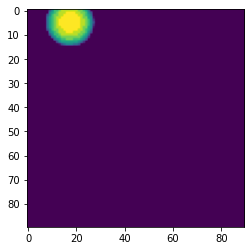

In [21]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [22]:
np.sum(img)



3625.0

In [23]:
percent_pixel_1 = np.sum(img[0:int(sm_third_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_third_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[0:int(sm_third_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_5 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_6 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_7 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_8 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_9 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)

In [27]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")
print("% in fifth pixel: " + str(percent_pixel_5 * 100) + "%")
print("% in sixth pixel: " + str(percent_pixel_6 * 100) + "%")
print("% in seventh pixel: " + str(percent_pixel_7 * 100) + "%")
print("% in eigth pixel: " + str(percent_pixel_8 * 100) + "%")
print("% in ninth pixel: " + str(percent_pixel_9 * 100) + "%")



% in first pixel: 100.0%
% in second pixel: 0.0%
% in third pixel: 0.0%
% in fourth pixel: 0.0%
% in fifth pixel: 0.0%
% in sixth pixel: 0.0%
% in seventh pixel: 0.0%
% in eigth pixel: 0.0%
% in ninth pixel: 0.0%


In [28]:
detector_array[closest_pixel_x,closest_pixel_y] += percent_pixel_1 * electrons_per_photon

In [29]:
electrons_pixel_1 = electrons_per_photon * percent_pixel_1
electrons_pixel_2 = electrons_per_photon * percent_pixel_2
electrons_pixel_3 = electrons_per_photon * percent_pixel_3
electrons_pixel_4 = electrons_per_photon * percent_pixel_4
print('number of electrons in pixel 1: ' + str(electrons_pixel_1))
print('number of electrons in pixel 2: ' + str(electrons_pixel_2))
print('number of electrons in pixel 3: ' + str(electrons_pixel_3))
print('number of electrons in pixel 4: ' + str(electrons_pixel_4))

number of electrons in pixel 1: 1500.0
number of electrons in pixel 2: 0.0
number of electrons in pixel 3: 0.0
number of electrons in pixel 4: 0.0
